In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/preprocessed.csv")

In [ ]:
df.head()

,Year,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Income,Psychosocial Factors,Sleep duration(Hrs),Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity,Income_scaled
0,2021,24,1,1,0,1,0,2186613.0,0,7,4,1,0,0,0.720980
1,2019,24,5,2,1,5,3,4712953.0,2,6,0,1,0,0,2.665359
2,2018,17,3,1,1,4,1,703630.5,2,11,1,1,0,0,-0.420387
3,2018,25,5,1,0,1,1,703630.5,2,12,2,1,0,0,-0.420387
4,2021,31,0,1,0,0,1,703630.5,2,10,1,1,0,0,-0.420387


In [ ]:
X = df.drop(['Psychological Health', 'Income_scaled'], axis=1)
y = df['Psychological Health']  # Target variable

KeyError: "['Psychological Health'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<H2> Random Forest Classifier</h2>

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6043409156048881


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.47      0.50     16302
           1       0.64      0.70      0.67     22077

    accuracy                           0.60     38379
   macro avg       0.59      0.59      0.59     38379
weighted avg       0.60      0.60      0.60     38379


Confusion Matrix:
[[ 7687  8615]
 [ 6570 15507]]


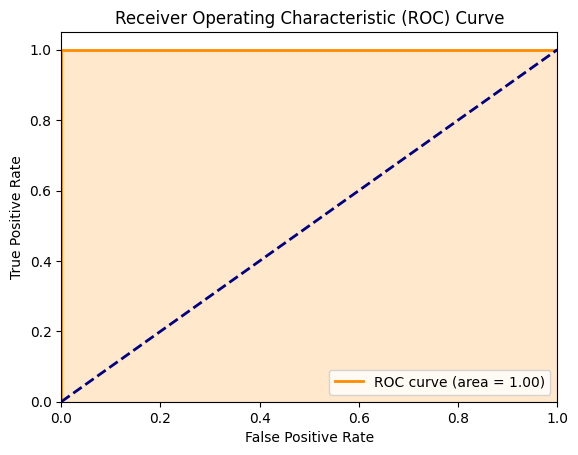

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels and predicted probabilities
# Replace these arrays with your actual data
y_true = np.array([0, 1, 0, 1])
y_score = np.array([0.1, 0.9, 0.3, 0.7])

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve and shade the area under the curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')  # Shade area under curve
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

XGBoost

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.6178639360066703


In [ ]:
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.44      0.49     16302
           1       0.64      0.75      0.69     22077

    accuracy                           0.62     38379
   macro avg       0.60      0.59      0.59     38379
weighted avg       0.61      0.62      0.61     38379


XGBoost Confusion Matrix:
[[ 7147  9155]
 [ 5511 16566]]


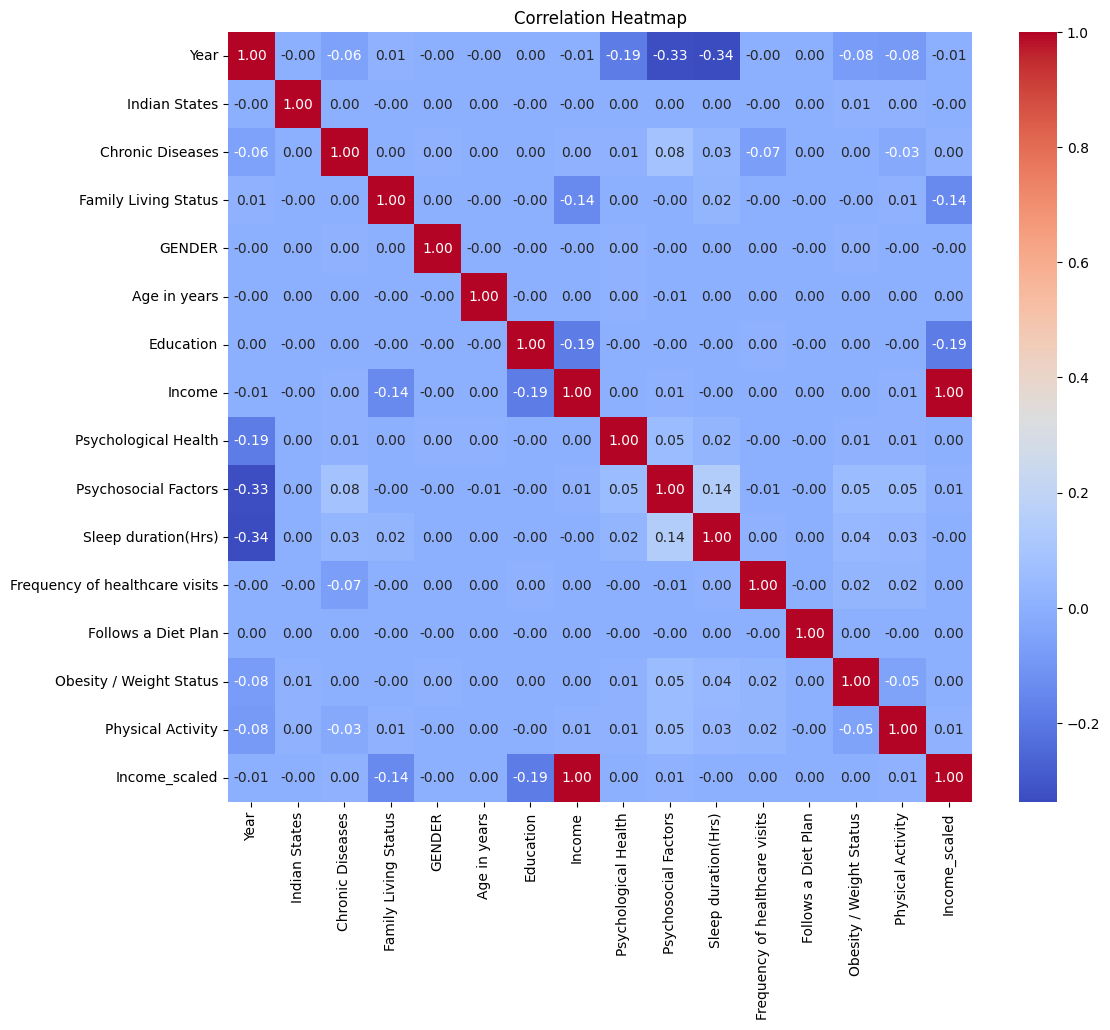

In [ ]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply chi-square test for feature selection
X_chi2 = SelectKBest(chi2, k='all').fit_transform(X_train, y_train)

# Visualizing correlation among features using heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


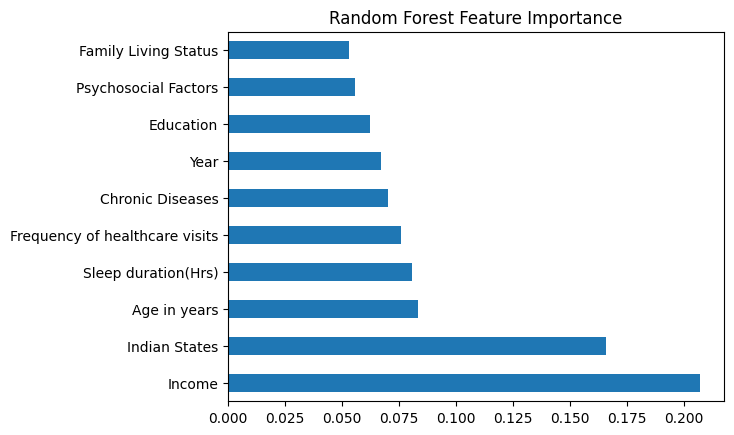

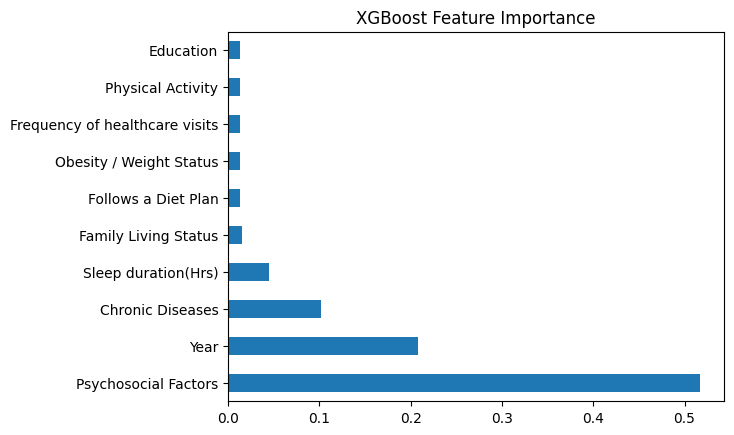

In [ ]:
# Plotting feature importance for Random Forest
feat_importances_rf = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

# Plotting feature importance for XGBoost
feat_importances_xgb = pd.Series(xgb_classifier.feature_importances_, index=X.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.show()
